In [24]:
## set up
import io
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
from sklearn.model_selection import train_test_split




In [3]:
SHEETURL: str = (
    "https://docs.google.com/spreadsheets/d/"
    "1sptWDnGOyRcEyCHFYhyC8Y_zXGGM5jMpePRVusoSkFs/"
    "edit?resourcekey=&gid=1530912831#gid=1530912831"
)

# format for CSV https://docs.google.com/spreadsheets/d/
# <SHEET_ID>/gviz/tq?tqx=
# out:csv&sheet=<SHEET_NAME>
SHEET_CSV_URL: str = (
    "https://docs.google.com/spreadsheets/d/"
    "1sptWDnGOyRcEyCHFYhyC8Y_zXGGM5jMpePRVusoSkFs/"
    "gviz/tq?tqx=out:csv&sheet=Altered/congregrated data"
)

In [4]:
# global variables for our current data purposes
Y_COLS = ["On a scale of 1 - 5 how successful do you feel you are in SEAL lab?",
            "On a scale of 1 - 5, how successful to do you feel your teammates are in SEAL lab?",
            "On a scale of 1 - 5, how successful do your peers think you are in SEAL lab?",
            "On whole, how would you rate your satisfaction in SEAL lab?"
            ]
#G:N
X_DEMO_COLS = ["What group are you primarily affiliated with in SEAL Life (shows up in SEAL clan life)?",
            "AGE (Congregated)",
            "Gender (CONGREGATED)",
            "How do you describe your sexual orientation?",	
            "Which categories best describe you?",
            "Do you have any chronic condition that substantially limit your life activities?",
            "If you have a disability, please indicate (if comfortable) the terms"
            " that best describe the condition(s)",	
            "Which economic class do you identify with?",
            "RELIGION (Congregated)"
            ]
# O:U
X_GAME_COLS = ["When playing games, I am most motivated by...",
            "I consider myself to be...",
            "When playing games, I consider myself to be...",
            "When playing games, I am generally...",
            "When playing games, I prefer to be...",
            "When playing games, I consider myself to be...",
            "When playing games, I generally..."
            ]
#C, V:AJ needs to be converted to scale of 1-5
X_SEAL_COLS = ["When I use the SEAL Sudoku Sheet Tools, I feel like I am playing a game. ",
            "I consider myself to be highly experienced with the SEAL Sheet Tools.",
            "I find the Sudoku Sheet Tools to be aesthetically pleasing.",
            "I think SEAL rank reflect my work and my team's work accurately.",
            "I think SEAL leaderboard reflect my work and my team's work accurately.",
            "I think SEAL YBR reflect my work and my team's work accurately.",
            "I think SEAL VisTools reflect my work and my team's work accurately.",
            "I think SEAL RaceTrack reflect my work and my team's work accurately.",
            "I think SEAL Battle Station reflect my work and my team's work accurately.",
            "I think SEAL Command Center reflect my work and my team's work accurately.",
            "I understand what my SEAL statistics mean (Lab HP, Sheet HP, YBR Gold Delta, and Training Score).",
            "I know exactly how my actions affect my lab statistics (Lab HP, Sheet HP, YBR Gold Delta, and Training Score).",
            "Using the Sudoku Sheet Tools helps me and my team stay on track.",	
            "Using the Sudoku Sheet Tools encourages me to take risks and challenge myself.",
            "Using the Sudoku Sheet Tools makes my work in SEAL more enjoyable."
            ]
#AO:AX
X_USABILITY_COLS = ["I think that I would like to use this system frequently.",
                    "I found the system unnecessarily complex.",
                    "I thought the system was easy to use.",
                    "I think that I would need the support of a technical person to be able to use this system.",
                    "I found the various functions in this system were well integrated.",
                    "I thought there was too much inconsistency in this system.",
                    "I would imagine that most people would learn to use this system very quickly.",
                    "I found the system very cumbersome to use.",	
                    "I felt very confident using the system.",	
                    "I needed to learn a lot of things before I could get going with this system."
                ]
X_DROP_COLS = ['Timestamp',
                "Sudoku Sheet Tools are all the tools you use when actively engaging with SEAL life."
                " Like Sudoku Clan Life, Dashboard, VisTools, RaceTrack, YBR, Kanban, Rank, Battle station, Venue, etc.",
                "What groups are you affiliated with in SEAL Life?",
                "Have you ever developed software as a programmer for Sudoku Sheet Tools?",
                "What is your current age?",
                "On scale of 1-10, how confusing were the questions on this survey?",
                "If you have any, we appreciate any additional feedback on the structure and questions within the survey",
                "SUS Overall score",	
                "Learnability subscore",
                "Usability subscore"
]

In [16]:
print(len(X_SEAL_COLS))

15


In [5]:
def get_data() -> DataFrame:  # idealy we dont want to us Any, but for now
    """function to get the data from the google sheet
    raises: HTTPError: if the request fails (meaning url wrong or no inter)

    @returns: @type(DataFrame): the data from the google sheet"""

    response = requests.get(SHEET_CSV_URL)
    response.raise_for_status()  # Raise error if request fails
    df: DataFrame = pd.read_csv(io.StringIO(response.text))
    return df

In [6]:
## ORIGINAL
data = get_data()
columns = data.columns
#print(columns)
data.shape # 68 x 55
#data.head()
X_SEAL_COLS = columns[21:36]
print(X_SEAL_COLS)

Index(['When I use the SEAL Sudoku Sheet Tools, I feel like I am playing a game. ',
       'I consider myself to be highly experienced with the SEAL Sheet Tools.',
       'I find the Sudoku Sheet Tools to be aesthetically pleasing.',
       'I think SEAL rank reflect my work and my team's work accurately.',
       'I think SEAL leaderboard reflect my work and my team's work accurately.',
       'I think SEAL YBR reflect my work and my team's work accurately.',
       'I think SEAL VisTools reflect my work and my team's work accurately.',
       'I think SEAL RaceTrack reflect my work and my team's work accurately.',
       'I think SEAL Battle Station reflect my work and my team's work accurately.',
       'I think SEAL Command Center reflect my work and my team's work accurately.',
       'I understand what my SEAL statistics mean (Lab HP, Sheet HP, YBR Gold Delta, and Training Score).',
       'I know exactly how my actions affect my lab statistics (Lab HP, Sheet HP, YBR Gold Delta, 

In [ ]:

#print(columns)
X_SEAL_COLS = columns[21:36]
#print(X_SEAL_COLS)

x_data = data.drop(columns = X_DROP_COLS + Y_COLS) # 68 x 49
#handle X_SEAL_COLS: map disagree - agree as 1-5
options_map = {'Strongly disagree': 1,
                'Disagree': 2, 
                'Neutral': 3,
                'Agree': 4,
                'Strongly agree': 5
            }
x_data[X_SEAL_COLS] = x_data[X_SEAL_COLS].replace(options_map)
# one-hot-encoding for categorical data (demographics)
x_data = pd.get_dummies(x_data)
print(x_data.columns)

y1_data, y2_data, y3_data, y4_data = [data[col].to_numpy() for col in Y_COLS]

In [10]:
def split_xy(data, drop_cols):
    """function to split the x and y data into separate ndarrays based on
    a set of columns to be dropped

    @parameter: data @type(DataFrame): unprocessed data 
    @parameter: drop_cols @type(ndarray): array of names of columns to drop

    @returns: @type(ndarray): relevant x-values from data
    @returns: @type(ndarray): y-values from data"""

    x_data = data.drop(columns=drop_cols + Y_COLS)

    # handle X_SEAL_COLS: map disagree - agree as 1-5
    options_map = {'Strongly disagree': 1,
                   'Disagree': 2,
                   'Neutral': 3,
                   'Agree': 4,
                   'Strongly agree': 5
                   }
    x_data[X_SEAL_COLS] = x_data[X_SEAL_COLS].replace(options_map)

    # handle NaN via imputation
    x_data[X_GAME_COLS[0:2]] = x_data[X_GAME_COLS[0:2]].fillna('No Response')
    x_data[X_GAME_COLS[2]] = x_data[X_GAME_COLS[2]].fillna(3)
    x_data[X_GAME_COLS[3:]] = x_data[X_GAME_COLS[3:]].fillna(3)
    x_data[X_DEMO_COLS] = x_data[X_DEMO_COLS].fillna('No Response')
    x_data[X_SEAL_COLS] = x_data[X_SEAL_COLS].fillna(3)
    x_data[X_USABILITY_COLS] = x_data[X_USABILITY_COLS].fillna(3)
    data[Y_COLS] = data[Y_COLS].fillna(3)

    # one-hot-encoding for categorical data (demographics, gaming)
    cat_col = x_data.select_dtypes(include=['object', 'category']).columns
    x_data = pd.get_dummies(x_data, columns = cat_col)
    y_data = data[Y_COLS]
    return x_data, y_data

In [ ]:
print(data[X_GAME_COLS].head())
x_data, y_data = split_xy(data, X_DROP_COLS)
x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.33)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

In [18]:
def standardize(x_train, x_val, x_test):
    """function that standardizes data to normal gaussian distribution.
    Standardization calculation is applied only to the training data.

    @parameter: x_train @type(nd.array) processed x training data to be standardized
    @parameter: x_val @type(nd.array) processed x val data to be standardized
    @paremeter: x_test @type(nd.array) processed x-test data to be standardized
    """
    scaler = StandardScaler().fit(x_train)  # only fit on training data
    x_train_stand = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns, index=x_train.index)
    x_val_stand = pd.DataFrame(scaler.transform(x_val), columns=x_val.columns, index=x_val.index)
    x_test_stand = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns, index=x_test.index)
    return x_train_stand, x_val_stand, x_test_stand

In [ ]:

lasso_data = pd.DataFrame(
    columns=['l1_penalty', 'model', 'rmse_train', 'rmse_validation'])
l1_lambdas = np.logspace(-4, 4, 100)
for l1 in l1_lambdas:
    lasso_model = Lasso(alpha=l1)
    lasso_model.fit(x_train, y_train)  # model
    lasso_predict = lasso_model.predict(x_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, lasso_predict))

    lasso_val = lasso_model.predict(x_train)
    rmse_validation = np.sqrt(mean_squared_error(y_train, lasso_val))
    lasso_data.loc[len(lasso_data)] = [l1, lasso_model, rmse_train, rmse_validation]
    

In [9]:

nans_per_column = data.isna().sum().sum()
print(nans_per_column)

#for col, nans in nans_per_column.items():
 #   if nans > 0:
  #      print(f"Column '{col[:30]}' | {nans}")

249


Column 'I think SEAL leaderboard reflect my work and my team's work accurately.' | 1
Column 'I think SEAL YBR reflect my work and my team's work accurately.' | 1
Column 'I think SEAL VisTools reflect my work and my team's work accurately.' | 1
Column 'I think SEAL RaceTrack reflect my work and my team's work accurately.' | 1
Column 'I think SEAL Battle Station reflect my work and my team's work accurately.' | 1
Column 'I think SEAL Command Center reflect my work and my team's work accurately.' | 1
Column 'I think that I would like to use this system frequently.' | 2
Column 'I found the system unnecessarily complex.' | 2
Column 'I thought the system was easy to use.' | 2
Column 'I think that I would need the support of a technical person to be able to use this system.' | 2
Column 'I found the various functions in this system were well integrated.' | 2
Column 'I thought there was too much inconsistency in this system.' | 2
Column 'I would imagine that most people would learn to use this 

In [ ]:
plt.plot(lasso_data['l1_penalty'], lasso_data['rmse_validation'],
         'b-^', label='Validation')

# Plot the train RMSE as a red line dots
plt.plot(lasso_data['l1_penalty'], lasso_data['rmse_train'],
         'r-o', label='Train')

# Set y-limits
rmse_max = max(lasso_data['rmse_train'].max(), lasso_data['rmse_validation'].max())
rmse_max *= 1.1  # Give a little buffer
plt.ylim(0, rmse_max)

# Make the x-axis log scale for readability
plt.xscale('log')

# Label the axes and make a legend
plt.xlabel('l1_penalty (log scale)')
plt.ylabel('RMSE')
plt.legend()

In [19]:
def linear_regression(x_train, y_train, x_val, y_val):
    models = []
    train_rmse = []
    val_rmse = []
    for i in range(y_train.shape[1]):
        y_t = y_train.iloc[:,i]
        y_v = y_val.iloc[:,i]
        model = LinearRegression().fit(x_train, y_t)
        predict_t = model.predict(x_train)
        t_rmse = np.sqrt(mean_squared_error(y_t, predict_t))
        predict_v = model.predict(x_val)
        v_rmse = np.sqrt(mean_squared_error(y_v, predict_v))

        train_rmse.append(t_rmse)
        val_rmse.append(v_rmse)
        models.append(model)
    print(x_train.columns)
    linear_visualization(models, x_train.columns, y_train.columns)
    return models, train_rmse, val_rmse

def linear_visualization(models, features, y_cols):
    for i, model in enumerate(models):
        coef = model.coef_

        coef_list = pd.DataFrame({"Feature": features, "Coef": coef})
        coef_list["abs"] = coef_list["Coef"].abs()
        top = coef_list.nlargest(10, "abs")
        print(top["Feature"], top["Coef"])

        plt.figure(figsize = (10,5))
        plt.barh(top["Feature"], top["Coef"])
        plt.xticks(rotation=45, ha="right")
        plt.xlabel("Features")
        plt.ylabel("Coef values")
        plt.title(f"{y_cols[i]}")
        plt.show()

Index(['When playing games, I consider myself to be...',
       'When playing games, I am generally...',
       'When playing games, I prefer to be...',
       'When playing games, I consider myself to be....1',
       'When playing games, I generally...',
       'When I use the SEAL Sudoku Sheet Tools, I feel like I am playing a game. ',
       'I consider myself to be highly experienced with the SEAL Sheet Tools.',
       'I find the Sudoku Sheet Tools to be aesthetically pleasing.',
       'I think SEAL rank reflect my work and my team's work accurately.',
       'I think SEAL leaderboard reflect my work and my team's work accurately.',
       ...
       'When playing games, I am most motivated by..._Mastering the game, Earning the most points',
       'When playing games, I am most motivated by..._Mastering the game, Earning the most points, Working with a team',
       'When playing games, I am most motivated by..._Mastering the game, Feeling immersed in the story/plot',
       'W

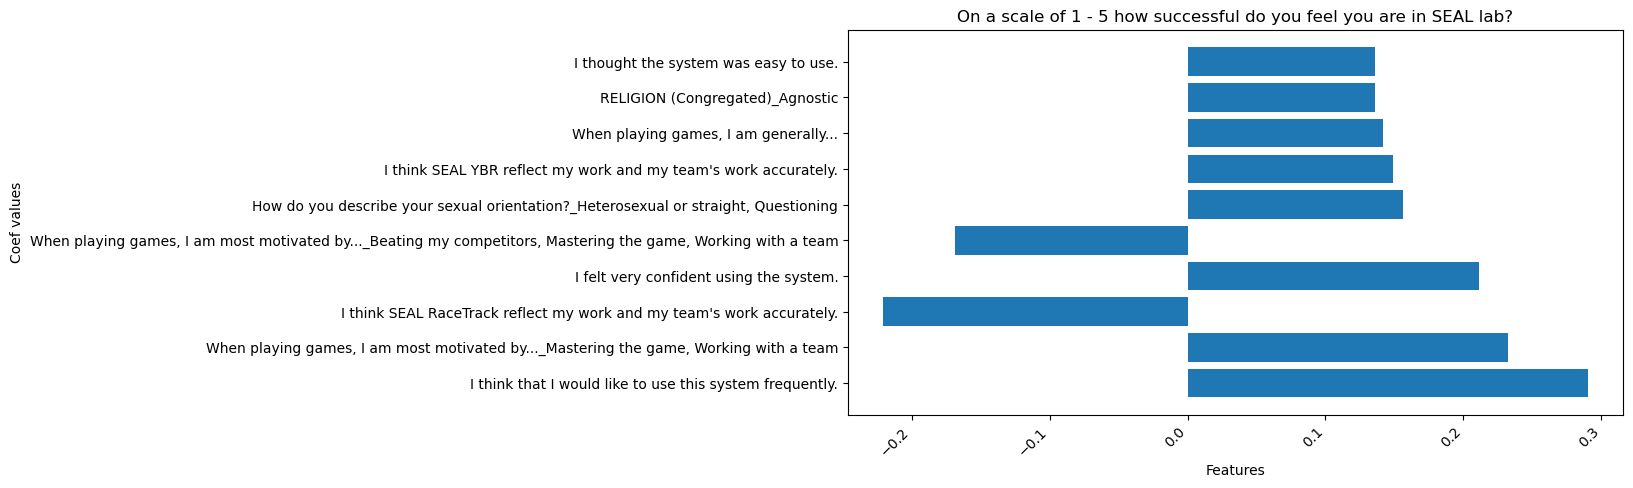

75                       RELIGION (Congregated)_Agnostic
76                      RELIGION (Congregated)_Agnostic 
83                          RELIGION (Congregated)_Hindu
26     I would imagine that most people would learn t...
109    When playing games, I am most motivated by..._...
98     When playing games, I am most motivated by..._...
114    I consider myself to be..._Equally motivated b...
20     I think that I would like to use this system f...
0         When playing games, I consider myself to be...
9      I think SEAL leaderboard reflect my work and m...
Name: Feature, dtype: object 75     0.306608
76    -0.234218
83    -0.210898
26     0.202533
109    0.188557
98    -0.176120
114   -0.162719
20     0.157889
0     -0.154893
9      0.145262
Name: Coef, dtype: float64


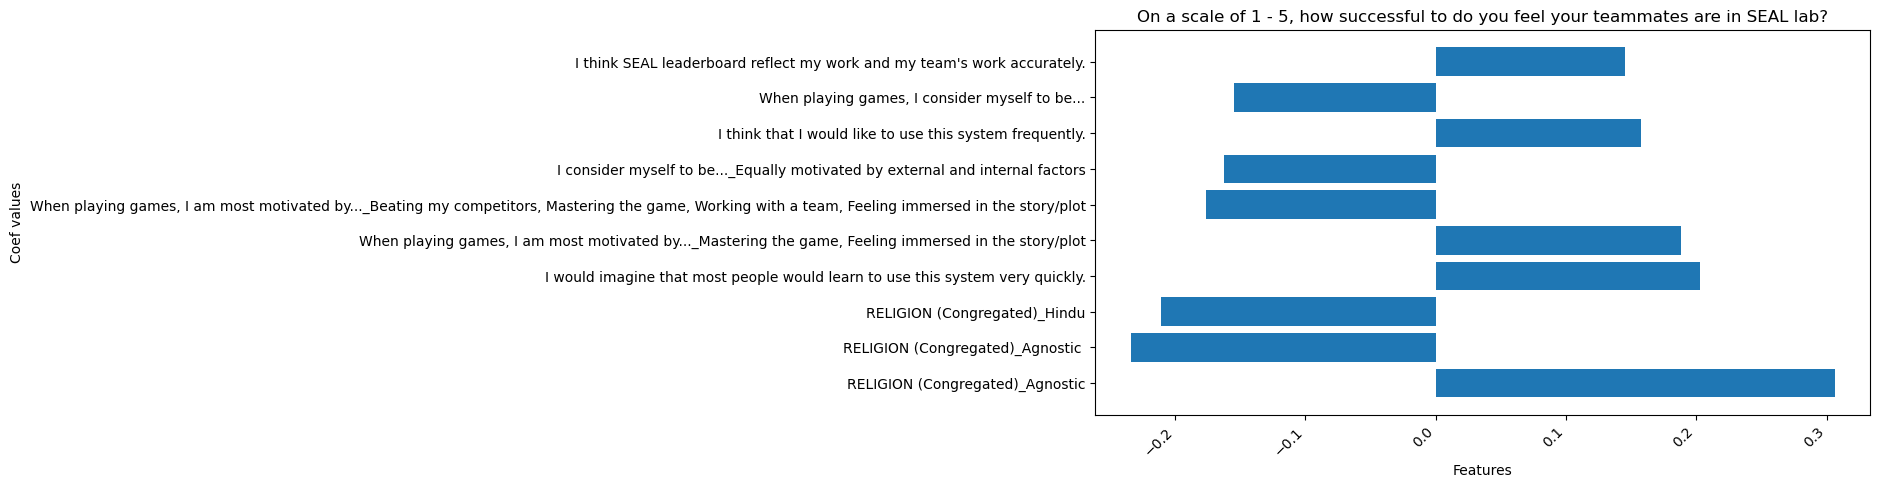

20     I think that I would like to use this system f...
110    When playing games, I am most motivated by..._...
28               I felt very confident using the system.
75                       RELIGION (Congregated)_Agnostic
47     How do you describe your sexual orientation?_H...
22                 I thought the system was easy to use.
44     How do you describe your sexual orientation?_B...
76                      RELIGION (Congregated)_Agnostic 
9      I think SEAL leaderboard reflect my work and m...
72     Which economic class do you identify with?_Poo...
Name: Feature, dtype: object 20     0.272425
110    0.247221
28     0.239293
75     0.210539
47     0.201667
22     0.188804
44     0.185394
76     0.176485
9      0.158485
72     0.155193
Name: Coef, dtype: float64


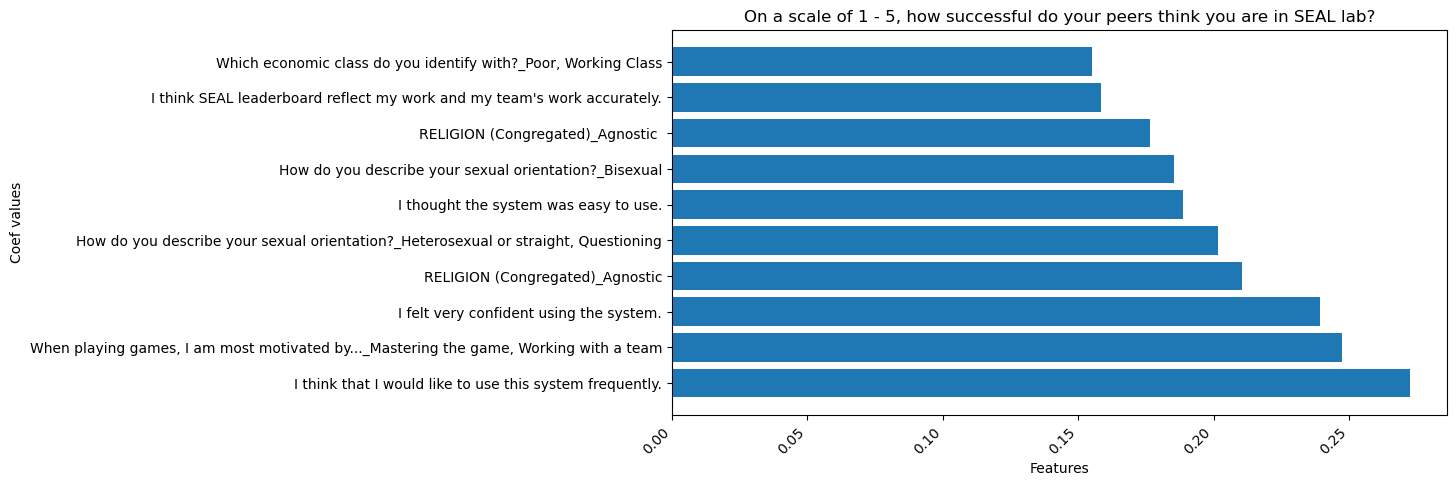

75                       RELIGION (Congregated)_Agnostic
20     I think that I would like to use this system f...
28               I felt very confident using the system.
18     Using the Sudoku Sheet Tools encourages me to ...
22                 I thought the system was easy to use.
2                  When playing games, I prefer to be...
7      I find the Sudoku Sheet Tools to be aesthetica...
78                       RELIGION (Congregated)_Atheist 
105    When playing games, I am most motivated by..._...
112    When playing games, I am most motivated by..._...
Name: Feature, dtype: object 75     0.284466
20     0.241829
28     0.228665
18     0.216174
22     0.191078
2      0.183320
7     -0.165835
78    -0.164365
105   -0.152027
112   -0.148666
Name: Coef, dtype: float64


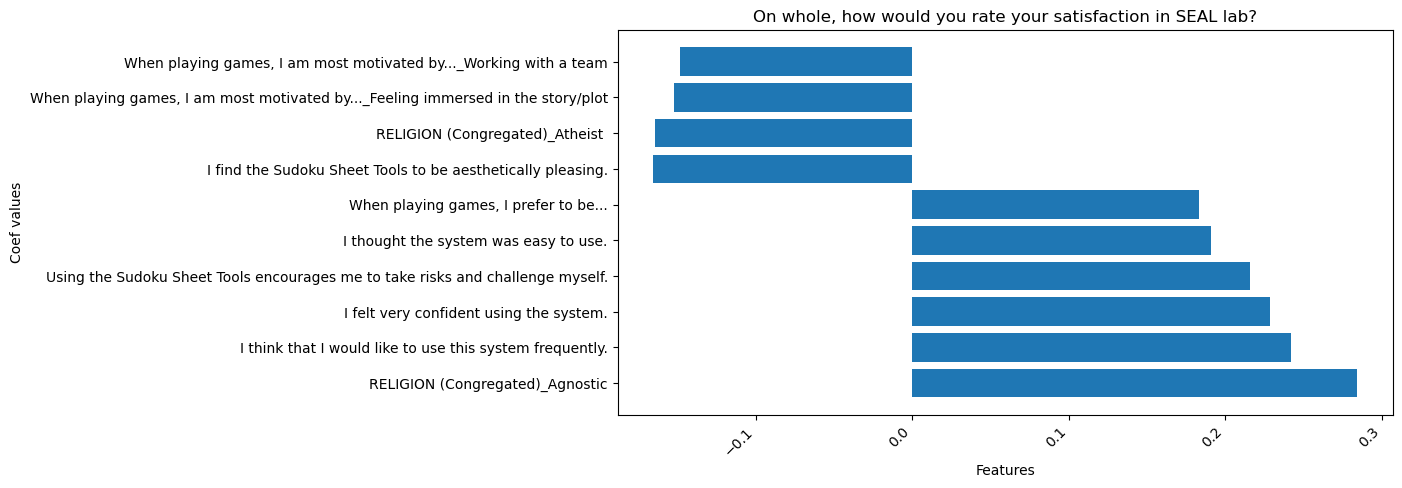

([LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 [1.7113900531629971e-15,
  2.1248458442430254e-15,
  2.41571572577266e-15,
  2.1378886246342107e-15],
 [1.1507444143650716,
  1.2818641615052204,
  1.1006599762010116,
  0.7672092578294771])

In [26]:
# Code to be executed when the script is run directly
data = get_data()

# pre-processing
x_data, y_data = split_xy(data, X_DROP_COLS)
y1, y2, y3, y4 = [y_data.iloc[:, i] for i in range(y_data.shape[1])]
x_nan = x_data.isna().sum().sum()
y_nan = y_data.isna().sum().sum()
#print("NaN values", x_nan, y_nan)
# NaN check


# 70% train 20% validation 10% test
x_train, x_temp, y_train, y_temp = train_test_split(
    x_data, y_data, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.33)

# normalization
x_train, x_val, x_test = standardize(x_train, x_val, x_test)
# feature selection

# model
linear_regression(x_train, y_train, x_val, y_val)

NaN values 0 0
Index(['When playing games, I consider myself to be...',
       'When playing games, I am generally...',
       'When playing games, I prefer to be...',
       'When playing games, I consider myself to be....1',
       'When playing games, I generally...',
       'When I use the SEAL Sudoku Sheet Tools, I feel like I am playing a game. ',
       'I consider myself to be highly experienced with the SEAL Sheet Tools.',
       'I find the Sudoku Sheet Tools to be aesthetically pleasing.',
       'I think SEAL rank reflect my work and my team's work accurately.',
       'I think SEAL leaderboard reflect my work and my team's work accurately.',
       ...
       'When playing games, I am most motivated by..._Mastering the game, Earning the most points',
       'When playing games, I am most motivated by..._Mastering the game, Earning the most points, Working with a team',
       'When playing games, I am most motivated by..._Mastering the game, Feeling immersed in the story/p

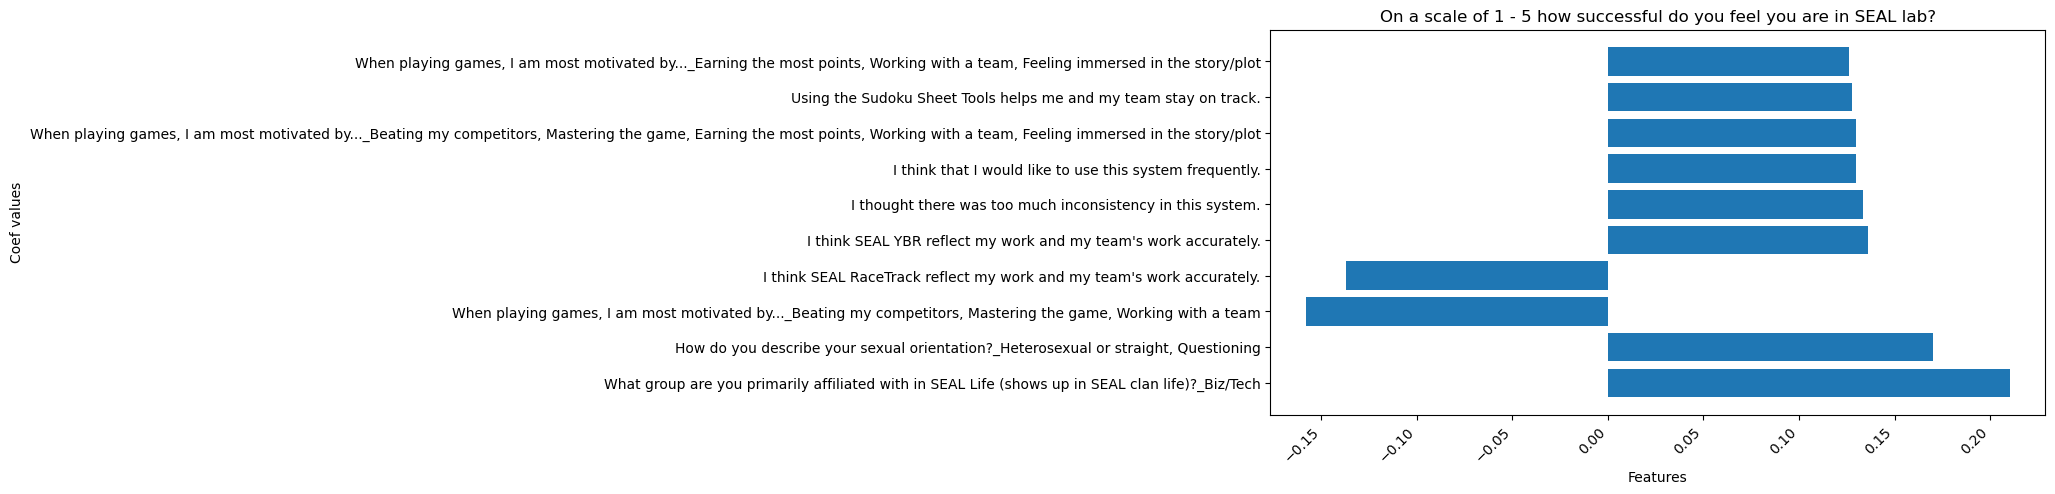

4                    When playing games, I generally...
30    What group are you primarily affiliated with i...
18    Using the Sudoku Sheet Tools encourages me to ...
20    I think that I would like to use this system f...
13    I think SEAL Battle Station reflect my work an...
33    What group are you primarily affiliated with i...
52    Which categories best describe you?_American I...
35    What group are you primarily affiliated with i...
98    When playing games, I am most motivated by..._...
86    When playing games, I am most motivated by..._...
Name: Feature, dtype: object 4    -0.199611
30    0.193153
18    0.175806
20    0.174459
13   -0.172535
33    0.162430
52    0.161548
35   -0.160931
98   -0.148634
86    0.145633
Name: Coef, dtype: float64


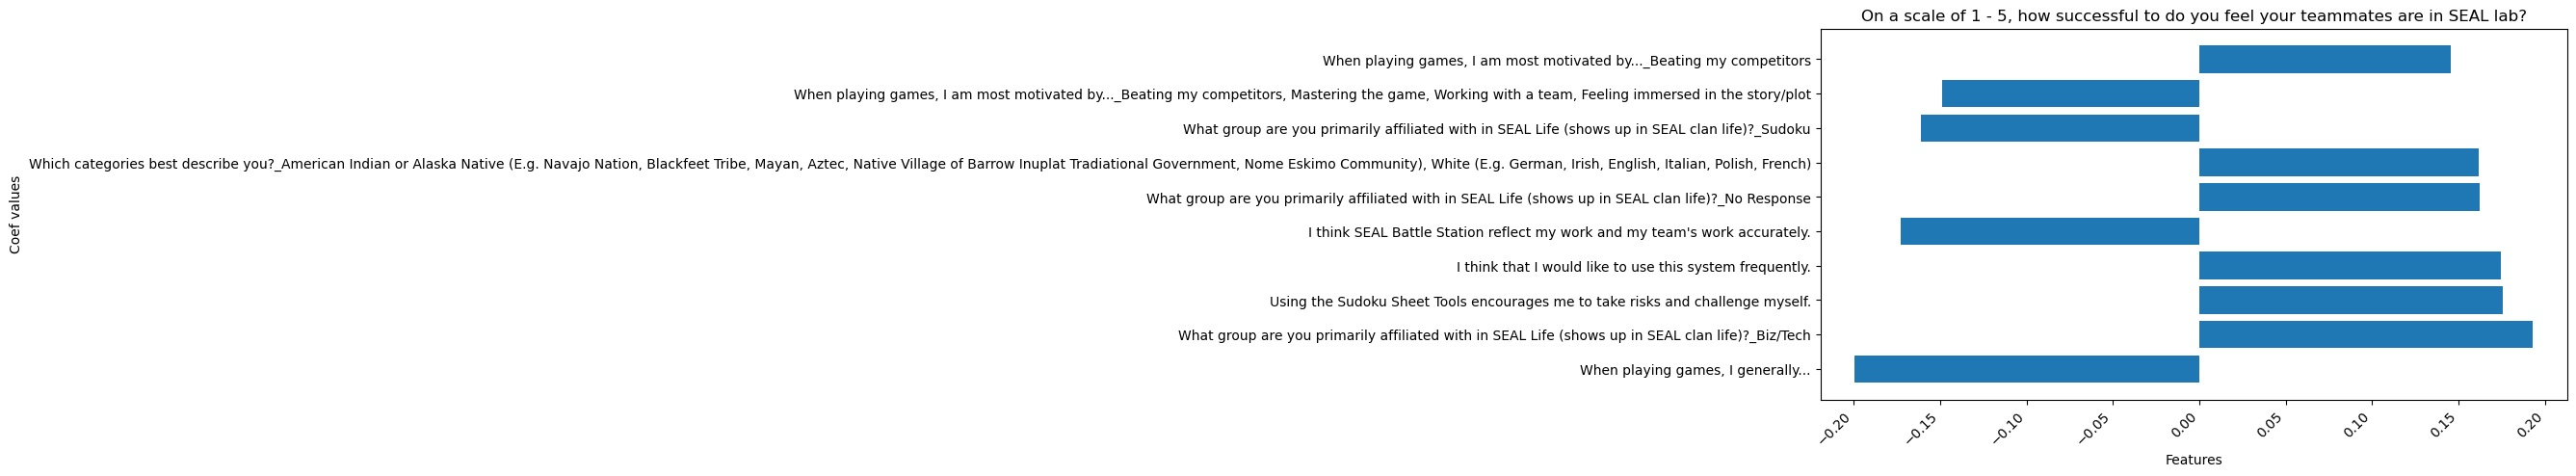

89     When playing games, I am most motivated by..._...
2                  When playing games, I prefer to be...
30     What group are you primarily affiliated with i...
75                       RELIGION (Congregated)_Agnostic
95     When playing games, I am most motivated by..._...
47     How do you describe your sexual orientation?_H...
86     When playing games, I am most motivated by..._...
14     I think SEAL Command Center reflect my work an...
78                       RELIGION (Congregated)_Atheist 
111    When playing games, I am most motivated by..._...
Name: Feature, dtype: object 89     0.221917
2     -0.218228
30     0.202585
75     0.190720
95     0.173376
47     0.164195
86     0.157397
14     0.152662
78    -0.151829
111   -0.149316
Name: Coef, dtype: float64


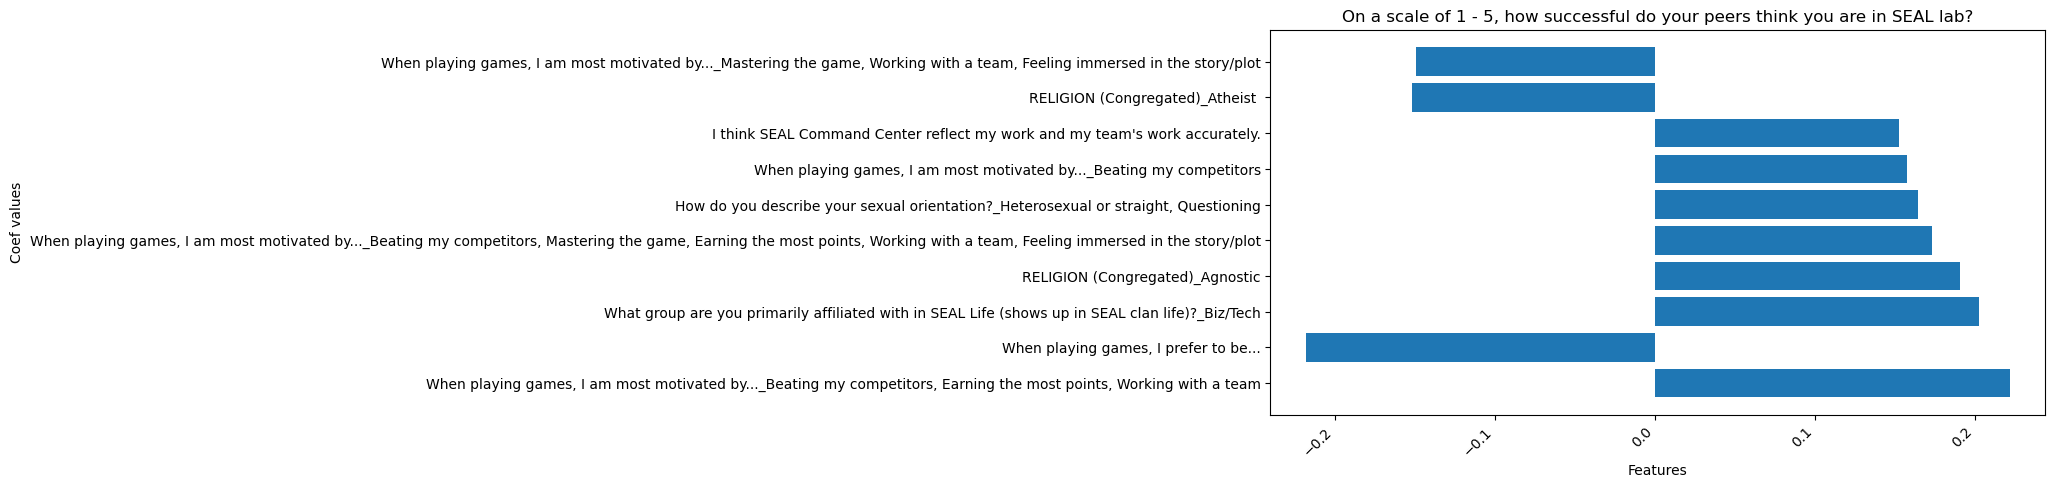

75                       RELIGION (Congregated)_Agnostic
8      I think SEAL rank reflect my work and my team'...
101    When playing games, I am most motivated by..._...
78                       RELIGION (Congregated)_Atheist 
61     Do you have any chronic condition that substan...
23     I think that I would need the support of a tec...
11     I think SEAL VisTools reflect my work and my t...
22                 I thought the system was easy to use.
104    When playing games, I am most motivated by..._...
86     When playing games, I am most motivated by..._...
Name: Feature, dtype: object 75     0.184842
8      0.149622
101    0.146744
78    -0.140715
61     0.138013
23     0.133746
11     0.133381
22     0.132874
104    0.122826
86     0.120835
Name: Coef, dtype: float64


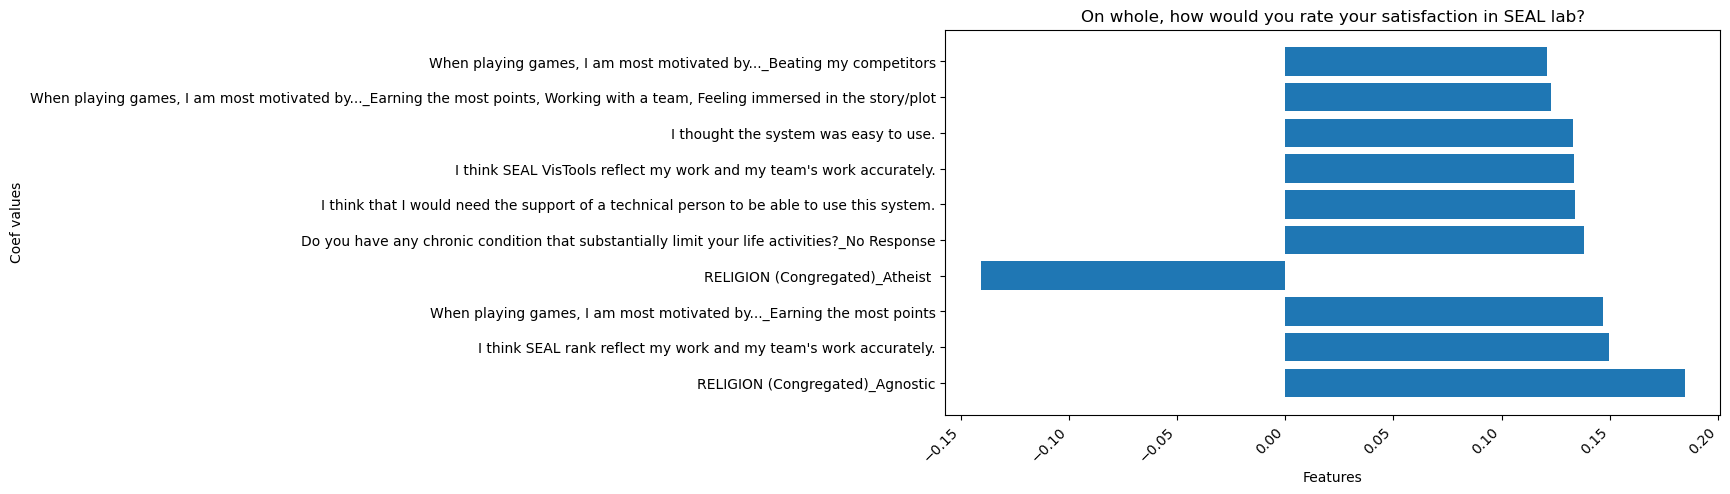

In [36]:
"""module to access data from google sheet, for getting set up with pandas"""
# ^^^ the above is documentation style comments
# this is used to describe modules, but also important to put in functions
# and classes. This is the equivalent to /** */ in java and enables hovering
# to check annotations.
# these usually go inside or in the "middle" of the function
# but still before the code starts
import io
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


# for stubs, if it says ur missing them do   mypy --install-types
# use pylint, mypy and pep8 extensions as linters (you might have to install
# with pip inaddition to the python extension)
# this is what types look like in python, we are going to use this to type
# hint our functions
# and also to help us keep track of variables

# global variables from javascript!
# but notice the lenght of the coding lines, this is a python convention.
# get the data at
SHEETURL: str = (
    "https://docs.google.com/spreadsheets/d/"
    "1sptWDnGOyRcEyCHFYhyC8Y_zXGGM5jMpePRVusoSkFs/"
    "edit?resourcekey=&gid=1530912831#gid=1530912831"
)

# format for CSV https://docs.google.com/spreadsheets/d/
# <SHEET_ID>/gviz/tq?tqx=
# out:csv&sheet=<SHEET_NAME>
SHEET_CSV_URL: str = (
    "https://docs.google.com/spreadsheets/d/"
    "1sptWDnGOyRcEyCHFYhyC8Y_zXGGM5jMpePRVusoSkFs/"
    "gviz/tq?tqx=out:csv&sheet=Altered/congregrated data"
)

# global variables for our current data purposes
Y_COLS = [
    "On a scale of 1 - 5 how successful do you feel you are in SEAL lab?",
    "On a scale of 1 - 5, how successful to do you feel your teammates are in SEAL lab?",
    "On a scale of 1 - 5, how successful do your peers think you are in SEAL lab?",
    "On whole, how would you rate your satisfaction in SEAL lab?"
]
# G:N
X_DEMO_COLS = [
    "What group are you primarily affiliated with in SEAL Life (shows up in SEAL clan life)?",
    "AGE (Congregated)",
    "Gender (CONGREGATED)",
    "How do you describe your sexual orientation?",
    "Which categories best describe you?",
    "Do you have any chronic condition that substantially limit your life activities?",
    "If you have a disability, please indicate (if comfortable) the terms"
    " that best describe the condition(s)",
    "Which economic class do you identify with?",
    "RELIGION (Congregated)"
]
# O:U
X_GAME_COLS = [
    "When playing games, I am most motivated by...",
    "I consider myself to be...",
    "When playing games, I consider myself to be...",
    "When playing games, I am generally...",
    "When playing games, I prefer to be...",
    "When playing games, I consider myself to be...",
    "When playing games, I generally..."
]
# V:AJ
X_SEAL_COLS = [
    "When I use the SEAL Sudoku Sheet Tools, I feel like I am playing a game. ",
    "I consider myself to be highly experienced with the SEAL Sheet Tools.",
    "I find the Sudoku Sheet Tools to be aesthetically pleasing.",
    "I think SEAL rank reflect my work and my team's work accurately.",
    "I think SEAL leaderboard reflect my work and my team's work accurately.",
    "I think SEAL YBR reflect my work and my team's work accurately.",
    "I think SEAL VisTools reflect my work and my team's work accurately.",
    "I think SEAL RaceTrack reflect my work and my team's work accurately.",
    "I think SEAL Battle Station reflect my work and my team's work accurately.",
    "I think SEAL Command Center reflect my work and my team's work accurately.",
    "I understand what my SEAL statistics mean (Lab HP, Sheet HP, YBR Gold Delta, and Training Score).",
    "I know exactly how my actions affect my lab statistics (Lab HP, Sheet HP, YBR Gold Delta, and Training Score).",
    "Using the Sudoku Sheet Tools helps me and my team stay on track.",
    "Using the Sudoku Sheet Tools encourages me to take risks and challenge myself.",
    "Using the Sudoku Sheet Tools makes my work in SEAL more enjoyable."
]
# AO:AX
X_USABILITY_COLS = [
    "I think that I would like to use this system frequently.",
    "I found the system unnecessarily complex.",
    "I thought the system was easy to use.",
    "I think that I would need the support of a technical person to be able to use this system.",
    "I found the various functions in this system were well integrated.",
    "I thought there was too much inconsistency in this system.",
    "I would imagine that most people would learn to use this system very quickly.",
    "I found the system very cumbersome to use.",
    "I felt very confident using the system.",
    "I needed to learn a lot of things before I could get going with this system."
]
X_DROP_COLS = [
    "Timestamp",
    "Sudoku Sheet Tools are all the tools you use when actively engaging with SEAL life. "
    "Like Sudoku Clan Life, Dashboard, VisTools, RaceTrack, YBR, Kanban, Rank, Battle station, Venue, etc.",
    "What groups are you affiliated with in SEAL Life?",
    "Have you ever developed software as a programmer for Sudoku Sheet Tools?",
    "What is your current age?",
    "On scale of 1-10, how confusing were the questions on this survey?",
    "If you have any, we appreciate any additional feedback on the structure and questions within the survey",
    "SUS Overall score",
    "Learnability subscore",
    "Usability subscore"
]


def get_data() -> DataFrame:  # idealy we dont want to us Any, but for now
    """function to get the data from the google sheet
    raises: HTTPError: if the request fails (meaning url wrong or no inter)

    @returns: @type(DataFrame): the data from the google sheet"""

    response = requests.get(SHEET_CSV_URL)
    response.raise_for_status()  # Raise error if request fails
    df: DataFrame = pd.read_csv(io.StringIO(response.text))
    return df


def main():
    """main function to run the script"""
    # Code to be executed when the script is run directly
    data = get_data()

    # pre-processing
    x_data, y_data = split_xy(data, X_DROP_COLS)
    y1, y2, y3, y4 = [y_data.iloc[:, i] for i in range(y_data.shape[1])]
    x_nan = x_data.isna().sum().sum()
    y_nan = y_data.isna().sum().sum()
    print("NaN values", x_nan, y_nan)
    # NaN check


    # 70% train 20% validation 10% test
    x_train, x_temp, y_train, y_temp = train_test_split(
        x_data, y_data, test_size=0.3)
    x_val, x_test, y_val, y_test = train_test_split(
        x_temp, y_temp, test_size=0.33)

    # normalization
    x_train, x_val, x_test = standardize(x_train, x_val, x_test)
    # feature selection

    # model
    linear_regression(x_train, y_train, x_val, y_val)



def split_xy(data, drop_cols):
    """function to split the x and y data into separate ndarrays based on
    a set of columns to be dropped

    @parameter: data @type(DataFrame): unprocessed data 
    @parameter: drop_cols @type(ndarray): array of names of columns to drop

    @returns: @type(ndarray): relevant x-values from data
    @returns: @type(ndarray): y-values from data"""

    x_data = data.drop(columns=drop_cols + Y_COLS)

    # handle X_SEAL_COLS: map disagree - agree as 1-5
    options_map = {'Strongly disagree': 1,
                   'Disagree': 2,
                   'Neutral': 3,
                   'Agree': 4,
                   'Strongly agree': 5
                   }
    x_data[X_SEAL_COLS] = x_data[X_SEAL_COLS].replace(options_map)

    # handle NaN via imputation
    x_data[X_GAME_COLS[0:2]] = x_data[X_GAME_COLS[0:2]].fillna('No Response')
    x_data[X_GAME_COLS[2]] = x_data[X_GAME_COLS[2]].fillna(3)
    x_data[X_GAME_COLS[3:]] = x_data[X_GAME_COLS[3:]].fillna(3)
    x_data[X_DEMO_COLS] = x_data[X_DEMO_COLS].fillna('No Response')
    x_data[X_SEAL_COLS] = x_data[X_SEAL_COLS].fillna(3)
    x_data[X_USABILITY_COLS] = x_data[X_USABILITY_COLS].fillna(3)
    data[Y_COLS] = data[Y_COLS].fillna(3)

    # one-hot-encoding for categorical data (demographics, gaming)
    cat_col = x_data.select_dtypes(include=['object', 'category']).columns
    x_data = pd.get_dummies(x_data, columns = cat_col)
    y_data = data[Y_COLS]
    return x_data, y_data


def standardize(x_train, x_val, x_test):
    """function that standardizes data to normal gaussian distribution.
    Standardization calculation is applied only to the training data.

    @parameter: x_train @type(nd.array) processed x training data to be standardized
    @parameter: x_val @type(nd.array) processed x val data to be standardized
    @paremeter: x_test @type(nd.array) processed x-test data to be standardized
    """
    scaler = StandardScaler().fit(x_train)  # only fit on training data
    x_train_stand = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns, index=x_train.index)
    x_val_stand = pd.DataFrame(scaler.transform(x_val), columns=x_val.columns, index=x_val.index)
    x_test_stand = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns, index=x_test.index)
    return x_train_stand, x_val_stand, x_test_stand


def feature_selection(x_train, y_train):
    """function to apply LASSO regression on training data to select optimal
    features.

    @parameter: x_train @type(nd.array) standardized x_train data"""

    lasso_data = pd.DataFrame(
        columns=['l1_penalty', 'model', 'rmse_train', 'rmse_validation'])
    l1_lambdas = np.logspace(-4, 4, 100)
    for l1 in l1_lambdas:
        lasso_model = Lasso(alpha=l1)
        lasso_model.fit(x_train, y_train)  # model
        lasso_predict = lasso_model.predict(x_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, lasso_predict))

        lasso_val = lasso_model.predict(x_train)
        rmse_validation = np.sqrt(mean_squared_error(y_train, lasso_val))
        lasso_data.loc[len(lasso_data)] = [l1, lasso_model, rmse_train, rmse_validation]

    # inspect coefficients
    best_l1 = None
    rmse_test_lasso = None
    num_zero_coeffs_lasso = None
    indx = lasso_data['rmse_validation'].idxmin()
    best_l1 = lasso_data.loc[indx]['l1_penalty']
    best_mod = lasso_data.loc[indx]['model']
    num_zero_coeffs_lasso = np.count_nonzero(best_mod.coef_ == 0)
    print("Best L1", best_l1)
    print("num zero coef", num_zero_coeffs_lasso)

    # see minimized features
    all_features = x_train.columns
    zero_coef = []
    for feature, coef in zip(all_features, best_mod.coef_):
        if abs(coef) <= 10 ** -17:
            zero_coef.append(feature)
    print(zero_coef)

    return best_l1

def linear_regression(x_train, y_train, x_val, y_val):
    models = []
    train_rmse = []
    val_rmse = []
    for i in range(y_train.shape[1]):
        y_t = y_train.iloc[:,i]
        y_v = y_val.iloc[:,i]
        model = LinearRegression().fit(x_train, y_t)
        predict_t = model.predict(x_train)
        t_rmse = np.sqrt(mean_squared_error(y_t, predict_t))
        predict_v = model.predict(x_val)
        v_rmse = np.sqrt(mean_squared_error(y_v, predict_v))

        train_rmse.append(t_rmse)
        val_rmse.append(v_rmse)
        models.append(model)
    print(x_train.columns)
    linear_visualization(models, x_train.columns, y_train.columns)
    return models, train_rmse, val_rmse

def linear_visualization(models, features, y_cols):
    for i, model in enumerate(models):
        coef = model.coef_

        coef_list = pd.DataFrame({"Feature": features, "Coef": coef})
        coef_list["abs"] = coef_list["Coef"].abs()
        top = coef_list.nlargest(10, "abs")
        print(top["Feature"], top["Coef"])

        plt.figure(figsize = (10,5))
        plt.barh(top["Feature"], top["Coef"])
        plt.xticks(rotation=45, ha="right")
        plt.xlabel("Features")
        plt.ylabel("Coef values")
        plt.title(f"{y_cols[i]}")
        plt.show()


# notice that in python things compile sequentially,
# so we have to have the main function at the end of the file
# and weird compiler stuff/stubs at bottom
# this is for compiling the code, so we can just run main
# needed so we can just hit the button and run the code
if __name__ == "__main__":
    main()
